# Music Information Retrieval

Music/Song track can be represented using features generated from:-

1. Audio
2. Lyrics
3. Tags
4. Metadata


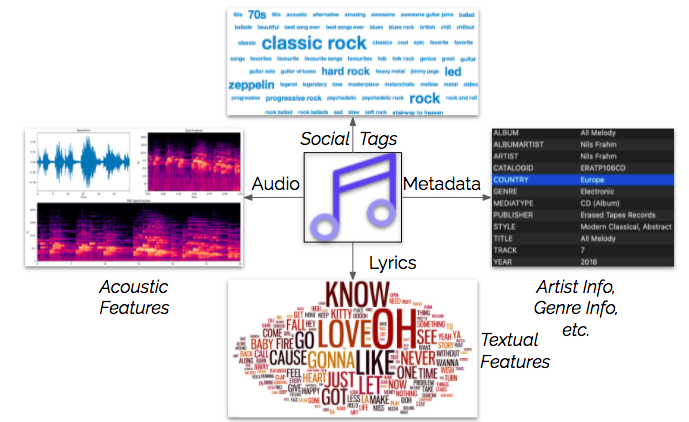

In this notebook, we will extract/fetch features from a given audio or lyrics. Before starting, change your hardware accelerator from CPU to GPU.
Edit->Notebook Settings->Hardware Accelerator

Spotify provides 12 features based on audio - Acousticness, Danceability, Duration, Energy, Instrumentalness, Liveness, Loudness, Speechiness, Tempo, and Valence. For more information you can look at [this](https://)

First, we look at a way to fetch these spotify features using [spotipy](https://spotipy.readthedocs.io/en/2.16.1/) library in python.  

Select two songs from billboard year end top100 from each of the last five years.

https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2021


In [140]:
!pip install spotipy
!pip install lyricsgenius
!pip install plotly

## Audio Features Extraction

In [141]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

Get your spotify client id and client secret from https://developer.spotify.com/dashboard/

In [142]:
credentials = SpotifyClientCredentials(
        client_id='ef797cfd52a14c619dc1a4f0af4e1fe9',
        client_secret='e1d001de4ea6472d99f40025ebc6f3af')

# credentials = SpotifyClientCredentials(client_id='client_id',client_secret='client_secret')


sp = spotipy.Spotify(client_credentials_manager = credentials)

In [143]:
artistname = "Ed Sheeran"
trackname = "Shape of you"

#### Getting track id given track and artistname

In [144]:
def getid(artistname, trackname):
  res = sp.search(trackname, limit = 10)
  for i in range(len(res['tracks']['items'])):
    if res['tracks']['items'][i]['artists'][0]['name'] == artistname:
      return res['tracks']['items'][i]['id']
  else:
    print("Artistname and trackname not found. Choose another song")

In [145]:
id = getid(artistname, trackname)

#### Getting spotify acoustic features and popularity
These features are extracted based on the audio of the song

In [146]:
def getspotifyfeatures(trackid):
  urn = "spotify:track:" + trackid
  out = sp.audio_features(tracks=urn)
  return out

In [147]:
def getspotifypopularity(trackid):
  urn = "spotify:track:" + trackid
  out = sp.track(urn)
  return out['popularity']

In [148]:
getspotifyfeatures(id)

[{'acousticness': 0.581,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7qiZfU4dY1lWllzX7mPBI3',
  'danceability': 0.825,
  'duration_ms': 233713,
  'energy': 0.652,
  'id': '7qiZfU4dY1lWllzX7mPBI3',
  'instrumentalness': 0,
  'key': 1,
  'liveness': 0.0931,
  'loudness': -3.183,
  'mode': 0,
  'speechiness': 0.0802,
  'tempo': 95.977,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/7qiZfU4dY1lWllzX7mPBI3',
  'type': 'audio_features',
  'uri': 'spotify:track:7qiZfU4dY1lWllzX7mPBI3',
  'valence': 0.931}]

Task 1 

In [149]:
artists = []
artistnames = []
tracknames = []
artistname = "Dua Lipa"


trackname = "Levitating"
artistnames.append(artistname)
tracknames.append(trackname)
id1  = getid(artistname, trackname)



In [150]:
artists.append(id1)
getspotifyfeatures(id1)

[{'acousticness': 0.00883,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5nujrmhLynf4yMoMtj8AQF',
  'danceability': 0.702,
  'duration_ms': 203064,
  'energy': 0.825,
  'id': '5nujrmhLynf4yMoMtj8AQF',
  'instrumentalness': 0,
  'key': 6,
  'liveness': 0.0674,
  'loudness': -3.787,
  'mode': 0,
  'speechiness': 0.0601,
  'tempo': 102.977,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/5nujrmhLynf4yMoMtj8AQF',
  'type': 'audio_features',
  'uri': 'spotify:track:5nujrmhLynf4yMoMtj8AQF',
  'valence': 0.915}]

In [151]:
artistname = "Olivia Rodrigo"
trackname = "Deja Vu"
id1  = getid(artistname, trackname)
artistnames.append(artistname)
tracknames.append(trackname)

In [152]:
artists.append(id1)
getspotifyfeatures(id1)

[{'acousticness': 0.584,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6HU7h9RYOaPRFeh0R3UeAr',
  'danceability': 0.442,
  'duration_ms': 215507,
  'energy': 0.612,
  'id': '6HU7h9RYOaPRFeh0R3UeAr',
  'instrumentalness': 5.7e-06,
  'key': 2,
  'liveness': 0.37,
  'loudness': -7.222,
  'mode': 1,
  'speechiness': 0.112,
  'tempo': 180.917,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/6HU7h9RYOaPRFeh0R3UeAr',
  'type': 'audio_features',
  'uri': 'spotify:track:6HU7h9RYOaPRFeh0R3UeAr',
  'valence': 0.178}]

In [153]:
artistname = "The Weeknd"
trackname = "Blinding Lights"
id1  = getid(artistname, trackname)
artistnames.append(artistname)
tracknames.append(trackname)

In [154]:
artists.append(id1)
getspotifyfeatures(id1)

[{'acousticness': 0.00146,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0VjIjW4GlUZAMYd2vXMi3b',
  'danceability': 0.514,
  'duration_ms': 200040,
  'energy': 0.73,
  'id': '0VjIjW4GlUZAMYd2vXMi3b',
  'instrumentalness': 9.54e-05,
  'key': 1,
  'liveness': 0.0897,
  'loudness': -5.934,
  'mode': 1,
  'speechiness': 0.0598,
  'tempo': 171.005,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/0VjIjW4GlUZAMYd2vXMi3b',
  'type': 'audio_features',
  'uri': 'spotify:track:0VjIjW4GlUZAMYd2vXMi3b',
  'valence': 0.334}]

In [155]:
artistname = "Roddy Ricch"
trackname = "The Box"
id1  = getid(artistname, trackname)
artistnames.append(artistname)
tracknames.append(trackname)

In [156]:
artists.append(id1)
getspotifyfeatures(id1)

[{'acousticness': 0.104,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0nbXyq5TXYPCO7pr3N8S4I',
  'danceability': 0.896,
  'duration_ms': 196653,
  'energy': 0.586,
  'id': '0nbXyq5TXYPCO7pr3N8S4I',
  'instrumentalness': 0,
  'key': 10,
  'liveness': 0.79,
  'loudness': -6.687,
  'mode': 0,
  'speechiness': 0.0559,
  'tempo': 116.971,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/0nbXyq5TXYPCO7pr3N8S4I',
  'type': 'audio_features',
  'uri': 'spotify:track:0nbXyq5TXYPCO7pr3N8S4I',
  'valence': 0.642}]

In [157]:
artistname = "Halsey"
trackname = "Without Me"
id1  = getid(artistname, trackname)
artistnames.append(artistname)
tracknames.append(trackname)

In [158]:
artists.append(id1)
getspotifyfeatures(id1)

[{'acousticness': 0.297,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5p7ujcrUXASCNwRaWNHR1C',
  'danceability': 0.752,
  'duration_ms': 201661,
  'energy': 0.488,
  'id': '5p7ujcrUXASCNwRaWNHR1C',
  'instrumentalness': 9.11e-06,
  'key': 6,
  'liveness': 0.0936,
  'loudness': -7.05,
  'mode': 1,
  'speechiness': 0.0705,
  'tempo': 136.041,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/5p7ujcrUXASCNwRaWNHR1C',
  'type': 'audio_features',
  'uri': 'spotify:track:5p7ujcrUXASCNwRaWNHR1C',
  'valence': 0.533}]

In [159]:
artistname = "Billie Eilish"
trackname = "Bad Guy"
id1  = getid(artistname, trackname)
artistnames.append(artistname)
tracknames.append(trackname)

In [160]:
artists.append(id1)
getspotifyfeatures(id1)

[{'acousticness': 0.328,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2Fxmhks0bxGSBdJ92vM42m',
  'danceability': 0.701,
  'duration_ms': 194088,
  'energy': 0.425,
  'id': '2Fxmhks0bxGSBdJ92vM42m',
  'instrumentalness': 0.13,
  'key': 7,
  'liveness': 0.1,
  'loudness': -10.965,
  'mode': 1,
  'speechiness': 0.375,
  'tempo': 135.128,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/2Fxmhks0bxGSBdJ92vM42m',
  'type': 'audio_features',
  'uri': 'spotify:track:2Fxmhks0bxGSBdJ92vM42m',
  'valence': 0.562}]

In [161]:
artistname = "Drake"
trackname = "God's Plan"
id1  = getid(artistname, trackname)
artistnames.append(artistname)
tracknames.append(trackname)

In [162]:
artists.append(id1)
getspotifyfeatures(id1)

[{'acousticness': 0.0332,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6DCZcSspjsKoFjzjrWoCdn',
  'danceability': 0.754,
  'duration_ms': 198973,
  'energy': 0.449,
  'id': '6DCZcSspjsKoFjzjrWoCdn',
  'instrumentalness': 8.29e-05,
  'key': 7,
  'liveness': 0.552,
  'loudness': -9.211,
  'mode': 1,
  'speechiness': 0.109,
  'tempo': 77.169,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/6DCZcSspjsKoFjzjrWoCdn',
  'type': 'audio_features',
  'uri': 'spotify:track:6DCZcSspjsKoFjzjrWoCdn',
  'valence': 0.357}]

In [163]:
artistname = "Ed Sheeran"
trackname = "Perfect"
id1  = getid(artistname, trackname)
artistnames.append(artistname)
tracknames.append(trackname)

In [164]:
artists.append(id1)
getspotifyfeatures(id1)

[{'acousticness': 0.163,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0tgVpDi06FyKpA1z0VMD4v',
  'danceability': 0.599,
  'duration_ms': 263400,
  'energy': 0.448,
  'id': '0tgVpDi06FyKpA1z0VMD4v',
  'instrumentalness': 0,
  'key': 8,
  'liveness': 0.106,
  'loudness': -6.312,
  'mode': 1,
  'speechiness': 0.0232,
  'tempo': 95.05,
  'time_signature': 3,
  'track_href': 'https://api.spotify.com/v1/tracks/0tgVpDi06FyKpA1z0VMD4v',
  'type': 'audio_features',
  'uri': 'spotify:track:0tgVpDi06FyKpA1z0VMD4v',
  'valence': 0.168}]

In [165]:
artistname = "Kendrick Lamar"
trackname = "Humble"
id1  = getid(artistname, trackname)
artistnames.append(artistname)
tracknames.append(trackname)

In [166]:
artists.append(id1)
getspotifyfeatures(id1)

[{'acousticness': 0.000282,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7KXjTSCq5nL1LoYtL7XAwS',
  'danceability': 0.908,
  'duration_ms': 177000,
  'energy': 0.621,
  'id': '7KXjTSCq5nL1LoYtL7XAwS',
  'instrumentalness': 5.39e-05,
  'key': 1,
  'liveness': 0.0958,
  'loudness': -6.638,
  'mode': 0,
  'speechiness': 0.102,
  'tempo': 150.011,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/7KXjTSCq5nL1LoYtL7XAwS',
  'type': 'audio_features',
  'uri': 'spotify:track:7KXjTSCq5nL1LoYtL7XAwS',
  'valence': 0.421}]

In [167]:
artistname = "The Chainsmokers"
trackname = "Something Just Like This"
id1  = getid(artistname, trackname)
artistnames.append(artistname)
tracknames.append(trackname)

In [168]:
artists.append(id1)
getspotifyfeatures(id1)

[{'acousticness': 0.0498,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6RUKPb4LETWmmr3iAEQktW',
  'danceability': 0.617,
  'duration_ms': 247160,
  'energy': 0.635,
  'id': '6RUKPb4LETWmmr3iAEQktW',
  'instrumentalness': 1.44e-05,
  'key': 11,
  'liveness': 0.164,
  'loudness': -6.769,
  'mode': 0,
  'speechiness': 0.0317,
  'tempo': 103.019,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/6RUKPb4LETWmmr3iAEQktW',
  'type': 'audio_features',
  'uri': 'spotify:track:6RUKPb4LETWmmr3iAEQktW',
  'valence': 0.446}]

 **Task 1 part b**

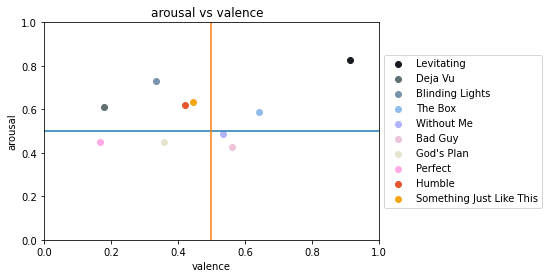

In [169]:
import matplotlib.pyplot as plt
import numpy as np
x = []
y = []
feature  = []
pl = []
colors = ['#171A21','#617073','#7A93AC','#92BCEA','#AFB3F7','#EBC3DB','#E6E4CE','#FFA9E7','#E4572E','#F3A712']
i=0
arr = []
for id in artists:
  feature = getspotifyfeatures(id)
  x.append(feature[0]['valence'])
  y.append(feature[0]['energy'])
  arr.append(tracknames[i])
  pl.append(plt.scatter(feature[0]['valence'],feature[0]['energy'],color = colors[i]))
  i+=1
# col = list(np.random.choice(range(256), size=10))

# arr = ['0','1','2','3','4','5','6','7','8','9']
plt.legend(pl,arr,loc='center left',bbox_to_anchor=(1,0.5))



plt.xlim(0,1)
plt.ylim(0,1)
plt.plot([0,1], [ 0.5, 0.5])
plt.plot([ 0.5, 0.5],[0,1])

plt.xlabel('valence')

plt.ylabel('arousal')

plt.title('arousal vs valence  ')

plt.show()


In [170]:
tracks  = sp.tracks(artists)


In [171]:
import requests
import sys 



for i in range(10):
  print(tracks['tracks'][i]['preview_url'])
  if(tracks['tracks'][i]['preview_url']!=None):
    print("Downloading song ")
    song = requests.get(tracks['tracks'][i]['preview_url'])
    filename = 'song' +str(i+1) 
    open(filename, 'wb').write(song.content)
  else : 
    print("Url  does not exist ")

  # song = requests.get(tracks['tracks'][i]['preview_url'])
  # filename = 'song' +str(i+1) 
  # open(filename, 'wb').write(song.content)

print()


https://p.scdn.co/mp3-preview/a690735072e85bebf1140d542365751629ae3d74?cid=ef797cfd52a14c619dc1a4f0af4e1fe9
None
Url  does not exist 
None
Url  does not exist 
https://p.scdn.co/mp3-preview/52c74a85b9b187b8f51bfe1c7b19a25f7624161a?cid=ef797cfd52a14c619dc1a4f0af4e1fe9
None
Url  does not exist 
None
Url  does not exist 
None
Url  does not exist 
https://p.scdn.co/mp3-preview/9779493d90a47f29e4257aa45bc6146d1ee9cb26?cid=ef797cfd52a14c619dc1a4f0af4e1fe9
None
Url  does not exist 
https://p.scdn.co/mp3-preview/cb1ae1f9e2f874dd2d19e4c29edb552777eb1e7a?cid=ef797cfd52a14c619dc1a4f0af4e1fe9



**Task 2 **

**Tasks**

1.   For one of the artists in your chosen songs, get the **top related artists** using spotipy API
2.   Get top **5 song recommendations** from the API based on the 10 songs selected. 
3. Download 30s audio clips of any song of your choice among the 10 using spotipy API.

If you are a spotify user there are API calls to extract information regarding your listening history, playlist, followings and others. 

#### Extracting acoustic features from raw audio signal

With the downloaded audio files. You can extract features from the raw audio file using following libraries
1. [Librosa](https://librosa.org/)
2. [OpenSmile](https://www.audeering.com/research/opensmile)
3. [Essentia](https://pypi.org/project/essentia/)
4. [MIR ToolBox](https://www.ismir.net/resources/software-tools/)

### Lyrics Features Extraction

#### Scrape Lyrics
Lyrics have copyright issues for free distribution, so most of the datasets based on lyrics only have track, artist artistname along with the intended annotations of the dataset. To scrape for lyrics, we use the GeniusAPI

In [172]:
import lyricsgenius

Get your API token from https://genius.com/api-clients

In [173]:
genius = lyricsgenius.Genius('27770e4c80530bfb03b80b262d1d915e')
#genius = lyricsgenius.Genius('apiclientkey')

In [174]:
def scrape(trackname, artistname):
  cnt = 0
  while 1:
    try:
      song = genius.search_song(trackname, artistname)
      return song.lyrics
      break
    except:
      cnt += 1
      if cnt == 5:
        print(trackname + " " + artistname + " Not present in Genius")
        return ""
      continue

In [175]:
lyrics = scrape(trackname, artistname)

Searching for "Something Just Like This" by The Chainsmokers...
Done.


In [176]:
lyrics = lyrics.split('\n')[1:]

In [177]:
lyrics

["I've been reading books of old",
 'The legends and the myths',
 'Achilles and his gold',
 'Hercules and his gifts',
 "Spider-Man's control",
 'And Batman with his fists',
 "And clearly I don't see myself upon that list",
 '',
 '[Pre-Chorus: Chris Martin]',
 "But she said, where d'you wanna go?",
 'How much you wanna risk?',
 "I'm not looking for somebody",
 'With some superhuman gifts',
 'Some superhero',
 'Some fairytale bliss',
 'Just something I can turn to',
 'Somebody I can kiss',
 'I want something just like this',
 'Doo-doo-doo, doo-doo-doo',
 'Doo-doo-doo, doo, doo',
 'Doo-doo-doo, doo-doo-doo',
 'Oh, I want something just like this',
 'Doo-doo-doo, doo-doo-doo',
 'Doo-doo-doo, doo, doo',
 'Doo-doo-doo, doo-doo-doo',
 '[Chorus: Chris Martin]',
 'Oh, I want something just like this',
 'I want something just like this',
 '',
 '[Verse 2: Chris Martin]',
 "I've been reading books of old",
 'The legends and the myths',
 'The testaments they told',
 'The moon and its eclipse',
 'An

### Self Similarity Matrix
Reference:- https://colinmorris.github.io/SongSim/#/

In [178]:
import string
import numpy as np
import matplotlib.pyplot as plt
import re

from nltk.tokenize import TweetTokenizer

In [179]:
def getsim(lyr):
  lyricstring = ""
  for line in lyr:
    if line != '':
      lyricstring = lyricstring + line + " "
  cleanr = re.compile('\[.*?\]|\(.*?\)')
  lyricstring = re.sub(cleanr, '', lyricstring.lower()) 
  punct = ""
  for p in string.punctuation:
    if p != '`' and p != "'":
      punct = punct + p
  lyricstring = "".join([char for char in lyricstring if char not in punct])
  tokenizer = TweetTokenizer()
  tokens = tokenizer.tokenize(lyricstring)

  ssm = np.zeros((len(tokens),len(tokens)),dtype=int)
  for i in range(len(tokens)):
    for j in range(len(tokens)):
      if tokens[i] == tokens[j]:
        ssm[i,j] = 1
      else:
        ssm[i,j] = 0
  plt.imshow(ssm, cmap='gray_r', aspect='auto')
  plt.xticks([])
  plt.yticks([])
  plt.gcf()

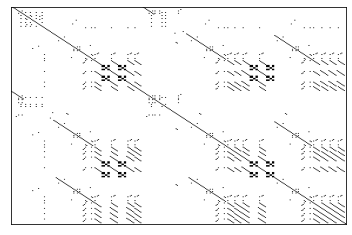

In [180]:
getsim(lyrics)

**Tasks**
  1. What feature of lyrics do you think the matrix represents?
  2. Check if there is a relation between compressibility score and the matrix?
  3. Generate self-similarity-matrices some of the most popular songs from each year and see if you can make an observation.

**Task 2**

**part a**

Long diagonals correspond to a major repeating theme .  
One of the repeated sections above appears as a sort of "Stripey Square" .
Checkerboards are a special case of the above pattern where the length of the repeated phrase is two words .
Filled-in blocks are another special case of the 'stripey squares' pattern, where what's chanted is just a single word.
Verses and bridges are typically distinguished by their lack of significant long-range repetition.
Broken diagonals suggest a variation on the chorus or another major repeating section.

**part b** 

Searching for "Levitating" by Dua Lipa...
Done.
Similarity Matrix  Levitating


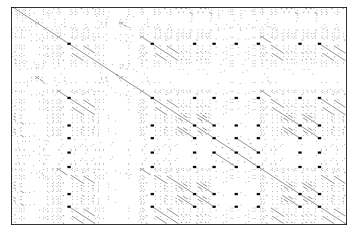


Searching for "Deja Vu" by Olivia Rodrigo...
Done.
Similarity Matrix  Deja Vu


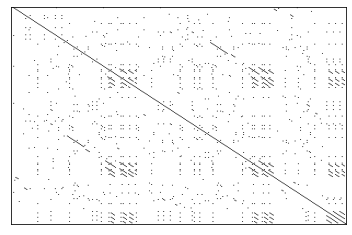


Searching for "Blinding Lights" by The Weeknd...
Done.
Similarity Matrix  Blinding Lights


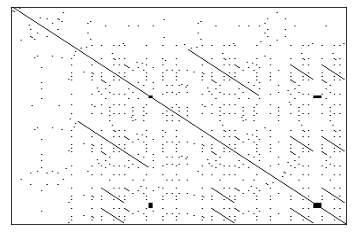


Searching for "The Box" by Roddy Ricch...
Done.
Similarity Matrix  The Box


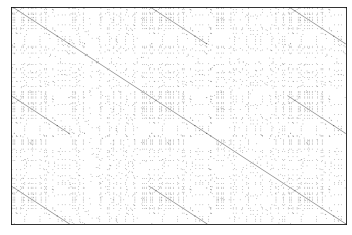


Searching for "Without Me" by Halsey...
Done.
Similarity Matrix  Without Me


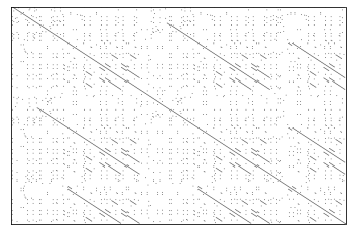


Searching for "Bad Guy" by Billie Eilish...
Done.
Similarity Matrix  Bad Guy


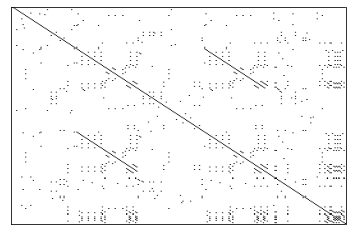


Searching for "God's Plan" by Drake...
Searching for "God's Plan" by Drake...
Searching for "God's Plan" by Drake...
Done.
Similarity Matrix  God's Plan


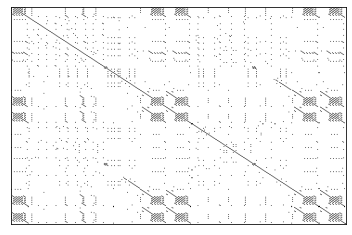


Searching for "Perfect" by Ed Sheeran...
Done.
Similarity Matrix  Perfect


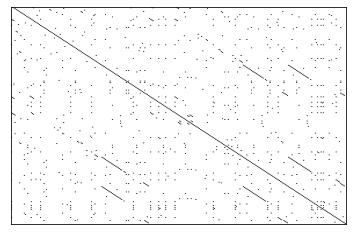


Searching for "Humble" by Kendrick Lamar...
Done.
Similarity Matrix  Humble


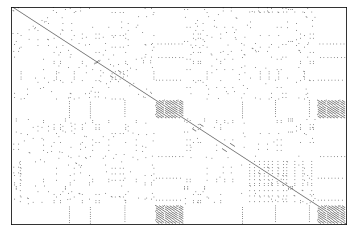


Searching for "Something Just Like This" by The Chainsmokers...
Done.
Similarity Matrix  Something Just Like This


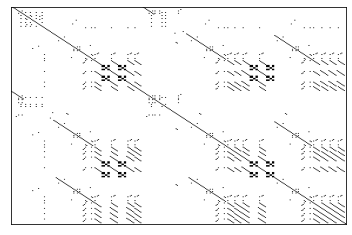

In [181]:
for i in range(10):
  track = tracknames[i]
  artist = artistnames[i]
  lyrics = scrape(track, artist)
  lyrics = lyrics.split('\n')[1:]
  print("Similarity Matrix ", track)
  getsim(lyrics)
  plt.show()
  print()

  

### Compressibility
We see the term compressibility thrown around very often when dealing with file transfer but how often does one see compressibility as a property of a song?

Before progressing any further, what effect do you think that the compressibility of a song would have on an individuals listening experience? 

*Your answer:*



In [182]:

def repeating_length_from_start(window, words):
    
    assert(type(window) == list)
    assert(type(words) == list)
    
    if window == [] or words == []:
        return 0
    
    if window[0] == words[0]:
        return 1 + repeating_length_from_start(
            window[1:] + [words[0]], words[1:]
        )
    else:
        return 0

def best_length_offset(window, words, max_length, max_offset):
    
    assert(type(window) == list)
    assert(type(words) == list)
    
    if max_offset < len(window):
        cut_window = window[-max_offset:]
    else:
        cut_window = window
        
    if words == [] or words is None:
        return (0, 0)
    
    length, offset = (1, 0)
    
    if words[0] not in cut_window:
        best_length = repeating_length_from_start([words[0]], words[1:])
        return (min((length + best_length), max_length), offset)
    
    length = 0
    
    for index in range(1, (len(cut_window) + 1)):
        # Get the word at this offset
        word = cut_window[-index]
        
        if word == words[0]:
            found_offset = index

            # Collect any further strings which can be found
            found_length = repeating_length_from_start(
                cut_window[-index:], words
            )

            if found_length > length:
                length = found_length
                offset = found_offset

    return (min(length, max_length), offset)

def compress(words):
    
    window = []
    output = []
    while words != []:
        length, offset = best_length_offset(window, words, 500, 500)
        output.append((offset, length, words[0]))
        window.extend(words[:length])
        words = words[length:]
        
    return output

def info_content(track):
    words = []
    
    for para in track:
        for line in para:
            line = line.strip().lower()
            line = line.split()
            
            for word in line:
                if word[0] == '[' or word[-1] == ']':
                    continue
                words.append(word)
                
    out = compress(words)
    
    if len(words) == 0:
        return 0
        # What value would you see just to return here and why?
    
    return len(out)


# info_content is called on the lyrics of a song - i.e. info_content(track_file["Lyrics"])

**part c**

In [183]:
for i in range(10):
  track = tracknames[i]
  artist = artistnames[i]
  lyrics = scrape(track, artist)
  lyrics = lyrics.split('\n')[1:]
  print("Compressibility score" ,info_content(lyrics))


Searching for "Levitating" by Dua Lipa...
Done.
Compressibility score 648
Searching for "Deja Vu" by Olivia Rodrigo...
Done.
Compressibility score 575
Searching for "Blinding Lights" by The Weeknd...
Done.
Compressibility score 352
Searching for "The Box" by Roddy Ricch...
Done.
Compressibility score 1021
Searching for "Without Me" by Halsey...
Done.
Compressibility score 595
Searching for "Bad Guy" by Billie Eilish...
Done.
Compressibility score 418
Searching for "God's Plan" by Drake...
Done.
Compressibility score 604
Searching for "Perfect" by Ed Sheeran...
Done.
Compressibility score 520
Searching for "Humble" by Kendrick Lamar...
Done.
Compressibility score 821
Searching for "Something Just Like This" by The Chainsmokers...
Done.
Compressibility score 434


correlation between the compressibility score of a song and the structure of the matrix -  compressibility score increases and matrix becomes less dense  . 

**part d**

From the above similarity matrix we can observer that matrix become more dense from 2017 to 2021 .This shows a trend in repetitiveness of lyrics in a song but since we are looking for a couple of songs per year it could also be random  .

# **Task 3**

**part a**

Value to return is equal to 0 .Reason is if lyrics is empty there is nothing to compress and compressibility is zero .

**part b**

In [184]:
artist_name = "246dkjvS1zLTtiykXe5h60"
top_tracks = sp.artist_top_tracks(artist_name)


In [185]:
!pip install pyyaml==5.4.1


Searching for "One Right Now (with The Weeknd)" by Post Malone...
Done.
Searching for "Circles" by Post Malone...
Done.
Searching for "Sunflower - Spider-Man: Into the Spider-Verse" by Post Malone...
Done.
Searching for "rockstar (feat. 21 Savage)" by Post Malone...
Done.
Searching for "Congratulations" by Post Malone...
Done.
Searching for "Motley Crew" by Post Malone...
Done.
Searching for "Better Now" by Post Malone...
Done.
Searching for "I Fall Apart" by Post Malone...
Done.
Searching for "Wow." by Post Malone...
Done.
Searching for "Psycho (feat. Ty Dolla $ign)" by Post Malone...
Done.


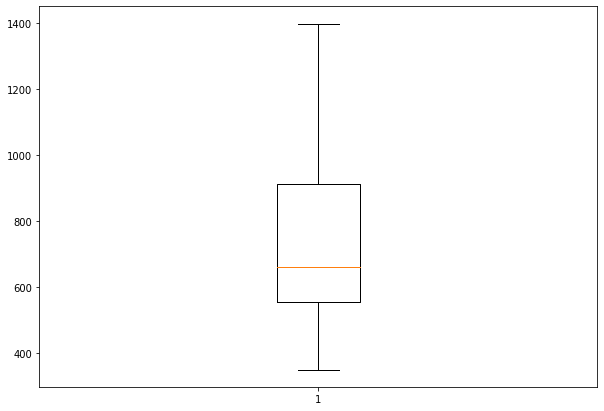

In [186]:

compressibility_values =  []
# import plotly.express as px

for i in range(10):
  track_name = top_tracks['tracks'][i]['name']
  artist_name =top_tracks['tracks'][i]['artists'][0]['name']
  lyrics = scrape(track_name, artist_name)
  lyrics = lyrics.split('\n')[1:]
  compressibility_values.append(info_content(lyrics))
  # print("Compressibility score for track_name" ,info_content(lyrics))
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(compressibility_values)
 
# show plot
plt.show()


**part c**

Searching for "Levitating" by Dua Lipa...
Done.
Searching for "Deja Vu" by Olivia Rodrigo...
Done.
Searching for "Blinding Lights" by The Weeknd...
Done.
Searching for "The Box" by Roddy Ricch...
Done.
Searching for "Without Me" by Halsey...
Done.
Searching for "Bad Guy" by Billie Eilish...
Done.
Searching for "God's Plan" by Drake...
Done.
Searching for "Perfect" by Ed Sheeran...
Done.
Searching for "Humble" by Kendrick Lamar...
Done.
Searching for "Something Just Like This" by The Chainsmokers...
Done.


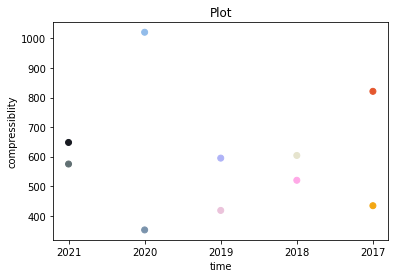

In [187]:
cs = []
year = ['2021','2021','2020','2020','2019','2019','2018','2018','2017','2017']
for i in range(10):
  track = tracknames[i]
  artist = artistnames[i]
  lyrics = scrape(track, artist)
  lyrics = lyrics.split('\n')[1:]
  cs.append(info_content(lyrics))
plt.scatter(year, cs,color = ['#171A21','#617073','#7A93AC','#92BCEA','#AFB3F7','#EBC3DB','#E6E4CE','#FFA9E7','#E4572E','#F3A712']
)
plt.xlabel('time')
plt.ylabel('compressiblity')
plt.title('Plot')
plt.show()


**Inference - THe above graph shows that compressibilty varies over time but the general trend shows it increases with time . ** 

**part d**

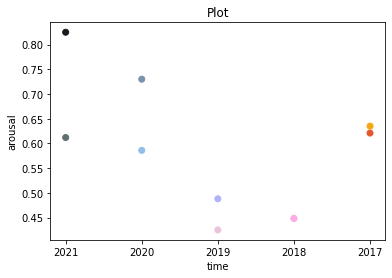

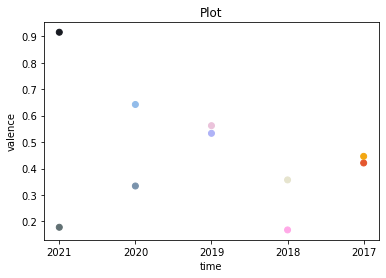

In [201]:
arousal = []
valence = []
plt.scatter(year, y,color = ['#171A21','#617073','#7A93AC','#92BCEA','#AFB3F7','#EBC3DB','#E6E4CE','#FFA9E7','#E4572E','#F3A712']
)
plt.xlabel('time')
plt.ylabel('arousal')
plt.title('Plot')
plt.show()
plt.scatter(year,x,color = ['#171A21','#617073','#7A93AC','#92BCEA','#AFB3F7','#EBC3DB','#E6E4CE','#FFA9E7','#E4572E','#F3A712']
)
plt.xlabel('time')
plt.ylabel('valence')
plt.title('Plot')
plt.show()

**Inference -**  Both valence and arousal increasing over the period of time .They both show similar trends . 

**part e**

There are four functions for compressibilty code .  
info_content () - calls compress function and return the value of compressibilty 

---


compress () - calls best_length_offset()  and calculate compressed words . 



---

best_length_offset() - calls  repeating_length_from_start and for input it takes   input string , window  and return the offset and length   with the biggest length of the input string as a substring

---

repeating_length_from_start()  - Get the maximum repeating length of the input from the start of the window 







**Tasks**

1. For the artist of your choice:
* Generate a boxplot of compression values.
* Note the year of the release of the songs you have and create a plot of compressibility vs time (year of release). If all the 'top' songs given by the spotify API are from the same year, choose multiple songs from different albums to carry out this analysis. 

2. Using the 10 song features, plot some of the features of a song (valence and arousal) over years and explain the observation.

3. Add brief comments to the above code - redundant verbosity isn't fun for anyone.

Please put efforts into your plots as this would make it easier for you to make observations and the same code could be reused for your projects / future assignments.

### Emotion From Lyrics

Ideally, you would train or fine-tune the model on the given lyrics annotated for emotion datasets. You can check the [code](https://github.com/yudhik11/MER-lyrics-Transformer) used for fine-tuning. We provide a checkpoint of the model to extract quadrant information from lyrics.
Check out the paper at [link](https://www.researchgate.net/publication/350570898_Transformer-Based_Approach_Towards_Music_Emotion_Recognition_from_Lyrics).

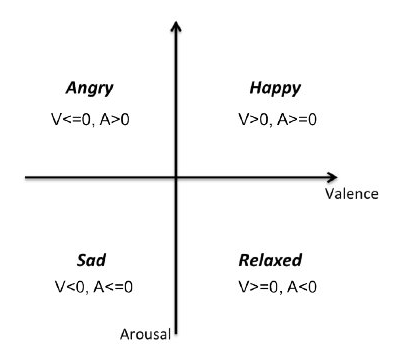

In [188]:
!pip install transformers
!pip install sentencepiece

In [189]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if torch.cuda.device_count() > 1:
    print("Let's use", torch.cuda.device_count(), "GPUs!")

from keras.preprocessing.sequence import pad_sequences

from transformers import XLNetTokenizer, XLNetForSequenceClassification, XLNetModel, AdamW

import pandas as pd


In [190]:
MAX_LEN = 1024
batch_size = 8

In [191]:
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased', do_lower_case=True)

In [192]:
model = XLNetForSequenceClassification.from_pretrained("xlnet-base-cased", num_labels=4)

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.bias', 'lm_loss.weight']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.bias', 'logits_proj.weight', 'logits_proj.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

In [193]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Get your model from this [link](https://drive.google.com/file/d/10pvg9UhyH0mrAWwF9h4b60G7nndh2Mfu/view?usp=sharing)

In [194]:
model.load_state_dict(torch.load('drive/My Drive/e_44_100.ckpt', map_location=device))
model = nn.DataParallel(model)
model.to(device)

DataParallel(
  (module): XLNetForSequenceClassification(
    (transformer): XLNetModel(
      (word_embedding): Embedding(32000, 768)
      (layer): ModuleList(
        (0): XLNetLayer(
          (rel_attn): XLNetRelativeAttention(
            (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (ff): XLNetFeedForward(
            (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (layer_1): Linear(in_features=768, out_features=3072, bias=True)
            (layer_2): Linear(in_features=3072, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (1): XLNetLayer(
          (rel_attn): XLNetRelativeAttention(
            (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (f

In [195]:
def Dataloader(songs):
    tokenized_texts = [tokenizer.tokenize(song) for song in songs]
    input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
    input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
    attention_masks = []


    for seq in input_ids:
        seq_mask = [float(i>0) for i in seq]
        attention_masks.append(seq_mask)
    validation_inputs = torch.tensor(input_ids)
    validation_masks = torch.tensor(attention_masks)

    validation_data = TensorDataset(validation_inputs, validation_masks)
    validation_sampler = SequentialSampler(validation_data)
    validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)
    
    return validation_dataloader


In [196]:
def eval(validation_dataloader):
    model.eval()
    val_len = 0
    total_loss = 0
    predictions = []
    with torch.no_grad():
        for step, batch in enumerate(validation_dataloader):
            batch = tuple(t.to(device) for t in batch)
            b_input_ids, b_input_mask = batch
            outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
            preds = outputs[0].detach().cpu().numpy()
            if step%100 == 0 and step:
                print("Step: %s" (step/len(validation_dataloader)))

            predictions.append(preds)
    return predictions

In [197]:
def clean(lyr):
  lyricstring = ""
  for line in lyr:
    if line != '':
      lyricstring = lyricstring + line + " "
  cleanr = re.compile('\[.*?\]|\(.*?\)')
  lyricstring = re.sub(cleanr, '', lyricstring.lower()) 
  punct = ""
  for p in string.punctuation:
    if p != '`' and p != "'":
      punct = punct + p
  lyricstring = "".join([char for char in lyricstring if char not in punct])
  return lyricstring

**Task 4**

In [198]:
emotions = []
for i in range(10):
  lyrics = scrape(tracknames[i], artistnames[i])
  lyrics = lyrics.split('\n')[1:]
  
  list_lyrics = []
  list_lyrics.append(clean(lyrics))
  vd = Dataloader(list_lyrics)
  arr = eval(vd)
  
  for a in arr:
    emotions.append(np.argmax(a))

Searching for "Levitating" by Dua Lipa...
Done.
Searching for "Deja Vu" by Olivia Rodrigo...
Done.
Searching for "Blinding Lights" by The Weeknd...
Done.
Searching for "The Box" by Roddy Ricch...
Done.
Searching for "Without Me" by Halsey...
Done.
Searching for "Bad Guy" by Billie Eilish...
Done.
Searching for "God's Plan" by Drake...
Done.
Searching for "Perfect" by Ed Sheeran...
Done.
Searching for "Humble" by Kendrick Lamar...
Done.
Searching for "Something Just Like This" by The Chainsmokers...
Done.


In [203]:
for i in range(10):
  print(tracknames[i], emotions[i])

from prettytable import PrettyTable
myTable = PrettyTable(["Songname", "Ml prediction ", "From Task 1 "])
  
# Add rows
myTable.add_row([tracknames[0], emotions[0],0 ])
myTable.add_row([tracknames[1],emotions[1], 1])
myTable.add_row([tracknames[2], emotions[2], 1])
myTable.add_row([tracknames[3], emotions[3], 0])
myTable.add_row([tracknames[4], emotions[4], 3])
myTable.add_row([tracknames[5], emotions[5], 3])
myTable.add_row([tracknames[6], emotions[6], 2])
myTable.add_row([tracknames[7], emotions[7], 2])
myTable.add_row([tracknames[8], emotions[8], 1])
myTable.add_row([tracknames[9], emotions[9], 1])
  
print(myTable)

Levitating 0
Deja Vu 2
Blinding Lights 2
The Box 2
Without Me 2
Bad Guy 1
God's Plan 1
Perfect 3
Humble 2
Something Just Like This 0
+--------------------------+----------------+--------------+
|         Songname         | Ml prediction  | From Task 1  |
+--------------------------+----------------+--------------+
|        Levitating        |       0        |      0       |
|         Deja Vu          |       2        |      1       |
|     Blinding Lights      |       2        |      1       |
|         The Box          |       2        |      0       |
|        Without Me        |       2        |      3       |
|         Bad Guy          |       1        |      3       |
|        God's Plan        |       1        |      2       |
|         Perfect          |       3        |      2       |
|          Humble          |       2        |      1       |
| Something Just Like This |       0        |      1       |
+--------------------------+----------------+--------------+


Emotion value from task 1 part b => 
Levitating 0 
Deja Vu 1
Blinding Lights 1
The Box 0
Without Me 3
Bad Guy 3
God's Plan 2
Perfect 2
Humble 1
Something Just Like This 1

Ml model predicted happy emotional songs correctly as levitationg and something just like this both have value 0 and lies in Q1 . Values of other emotions are not similar to task 1 but listening to each song the emotion induced is more accurate . 

0 - Q1 or Happy Emotion

1 - Q2 or Angry Emotion

2 - Q3 or Sad Emotion

3 - Q4 or Angry Emotion

Tasks
1. For each of the songs compare the emotion given by the lyrics as well as from the spotify features (valence and energy) and note your observations. 

Convert the range of valence and energy to -1 to 1.

2. Plot the songs in the same 2-D plane according to their valence and energy values given by the spotify API and the above model.

### Other things that can be done on Lyrics
NLP techniques can be used to extract features from lyrics. Some of which are
1. Lyrics Topic Analysis
2. Lyrics Generation 


### MIR Using Social Tags

We use the LastFM API to scrape the social tags of a song. 
These social tags are given by the users so it contains a lot of information regarding a song. It contains information like perceived emotion by users, genre of the song, user's interpretation of the song, themes in lyrics and others.

These tags can be used to extract features using NLP techniques.

Click here to check the official documentation [link](https://www.last.fm/api)